

1.   import needed pckg

2.   explore & prepare data

3.   Finetune the DonUT model on the data
 * load the fine-tuned model and see its results on an **image example**



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
ls

drive/  sample_data/


In [3]:
from PIL import Image
import torch

!git clone https://github.com/clovaai/donut.git
!cd donut && pip install .
from donut import DonutModel

import json
import shutil

Cloning into 'donut'...
remote: Enumerating objects: 264, done.
remote: Total 264 (delta 0), reused 0 (delta 0), pack-reused 264
Receiving objects: 100% (264/264), 62.75 MiB | 36.34 MiB/s, done.
Resolving deltas: 100% (123/123), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/donut
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.8/825.8 KB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.4/512.4 KB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 KB 15.7 MB/s eta 0:0

# explore &&  prepare data

In [4]:
ls

donut/  drive/  sample_data/


# Finetune the DonUT model on the data

**⚠️ Go to "/content/donut/config" folder, add a new file called "train_ubiai.yaml" and copy the following config rows in it:**
```
resume_from_checkpoint_path: null # only used for resume_from_checkpoint option in PL
result_path: "/content/drive/MyDrive/Invoice dataset/UBIAI_dataset/processed_dataset/result"
pretrained_model_name_or_path: "naver-clova-ix/donut-base" # loading a pre-trained model (from moldehub or path)
dataset_name_or_paths: ["/content/drive/MyDrive/Invoice dataset/UBIAI_dataset/processed_dataset"] # loading datasets (from moldehub or path)
sort_json_key: False # cord dataset is preprocessed, and publicly available at https://huggingface.co/datasets/naver-clova-ix/cord-v2
train_batch_sizes: [1]
val_batch_sizes: [1]
input_size: [1280, 960] # when the input resolution differs from the pre-training setting, some weights will be newly initialized (but the model training would be okay)
max_length: 768
align_long_axis: False
num_nodes: 1
seed: 2022
lr: 3e-5
warmup_steps: 300 # 800/8*30/10, 10%
num_training_samples_per_epoch: 800
max_epochs: 50
max_steps: -1
num_workers: 8
val_check_interval: 1.0
check_val_every_n_epoch: 3
gradient_clip_val: 1.0
verbose: True
```



In [ ]:
# train the model
!cd donut && python train.py --config config/train_ubiai.yaml

### load the fine-tuned model and see its results on an image example

In [5]:
my_model = DonutModel.from_pretrained("naver-clova-ix/donut-base-finetuned-cord-v2")

Downloading:   0%|          | 0.00/404 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/859M [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Downloading:   0%|          | 0.00/1.30M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/335 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/536 [00:00<?, ?B/s]

In [7]:
my_model = DonutModel.from_pretrained("/content/drive/MyDrive/donut/dataset/SynthDoG_ukr/result/train_ubiai/20230120_225329").half().to(torch.device("cuda")).eval()

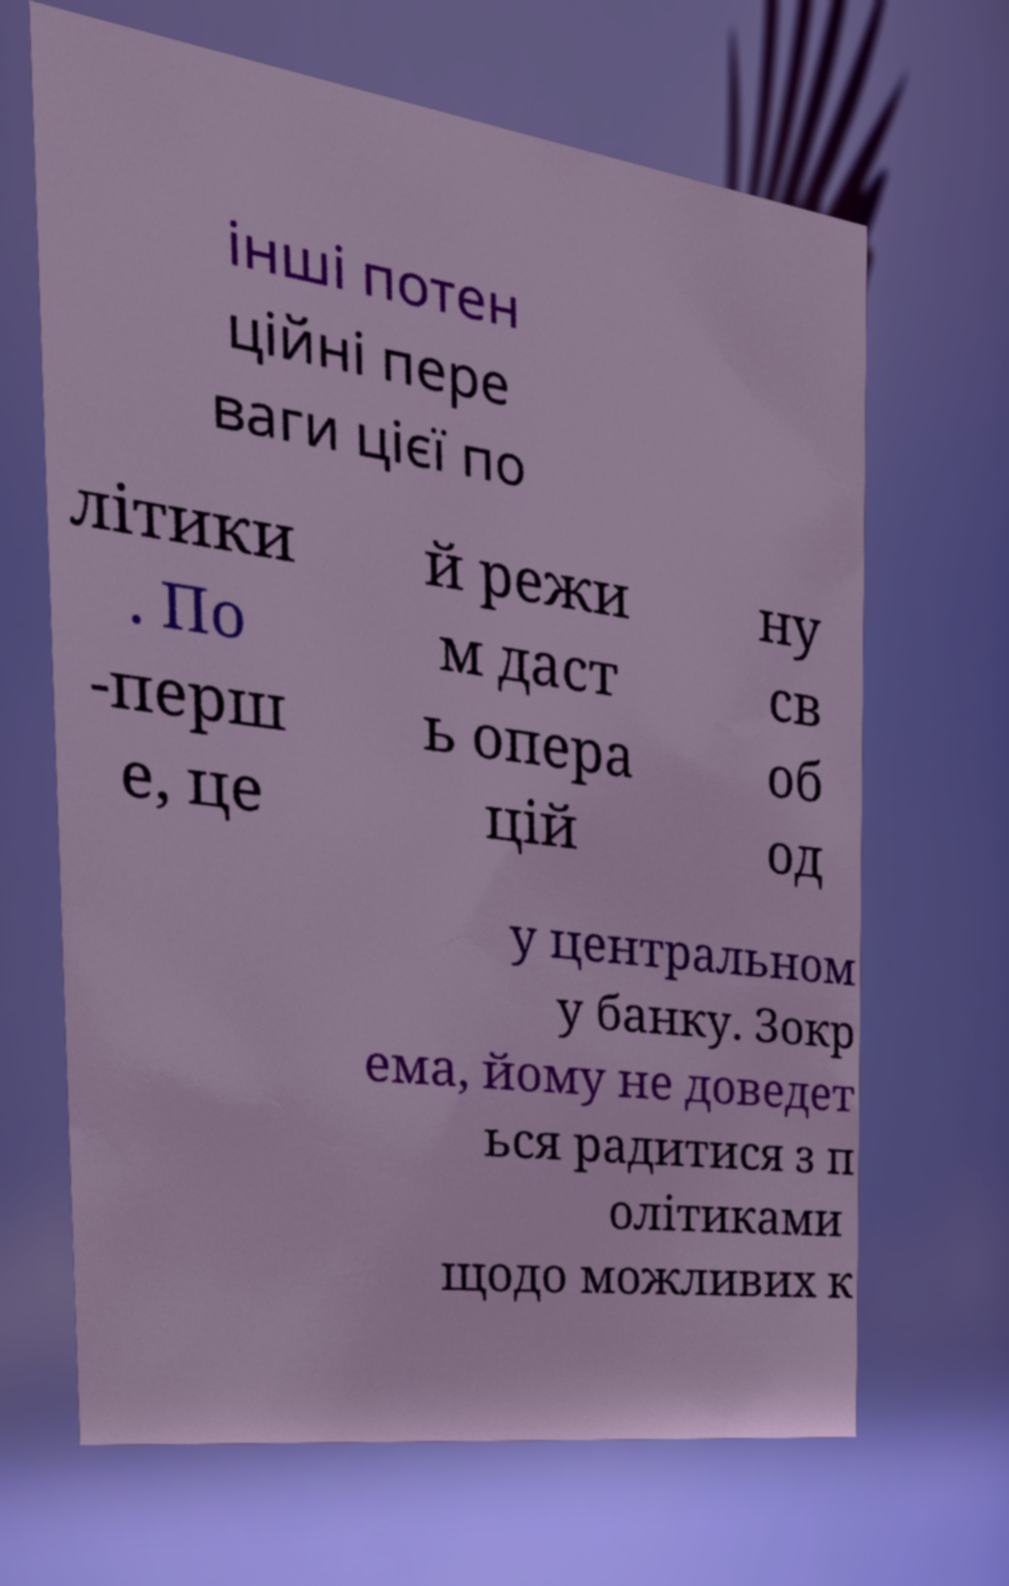


Fine-tuned DonUT annotation results:



{'predictions': [{'text_sequence': '. шук... -президент е, Це плати.. -президент е, Це е, Це й.. -президент е, Це е, Це й... е е, йтою президент ьCя насиль. шук е, йжені е грес ьCя насили. шук е е, йжені ьCя насиль...... е йжені люде люде е люде ь ь люде люде ь люд ь люд ь ь люд ь ь ь я ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь ь'}]}

In [10]:
image = Image.open("/content/drive/MyDrive/donut/dataset/SynthDoG_ukr/test/image_110.jpg").convert("RGB")

img = image.resize((round(image.size[0]/3), round(image.size[1]/3)))
display(image)

donut_result = my_model.inference(image=image, prompt="<s_ubiai-donut>")

print("\nFine-tuned DonUT annotation results:\n")
donut_result

In [21]:
import json
# Compare annotation results (printed just above) of the DonUT model that we have fine tuned on our data, with the ground truth
print("Ground truth:\n")

with open('/content/drive/MyDrive/donut/dataset/SynthDoG_ukr/test/metadata.jsonl') as f:
  data = [json.loads(line) for line in f]
  print(json.dumps(data[8], indent=4, ensure_ascii=False))

Ground truth:

{
    "file_name": "image_110.jpg",
    "ground_truth": "{\"gt_parse\": {\"text_sequence\": \"інші потен ційні пере ваги цієї по літики . По -перш е, це й режи м даст ь опера цій ну св об од у центральном у банку. Зокр ема, йому не доведет ься радитися з п олітиками щодо можливих к\"}}"
}


In [ ]:
# Compare annotation results (printed just above) of the DonUT model that we have fine tuned on our data, with the ground truth
print("Ground truth:\n")
images_metadata[images_path.index('1555322739590_2021-10-26_195917.5.txt_image_0.jpg')]['gt_parse']